<a href="https://colab.research.google.com/github/bravoeight98/215HW1/blob/master/CSE465.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 550 µs (started: 2022-11-27 17:32:25 +00:00)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.92 s (started: 2022-11-27 17:32:25 +00:00)


In [4]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# defining dir variables 
root_dir = '/content/drive/MyDrive/465/'
train_dir = root_dir + 'train/'
test_dir = root_dir + 'test/'

time: 318 ms (started: 2022-11-27 17:32:29 +00:00)


In [5]:
target_var = os.listdir(train_dir)
target_var

['surprised', 'disgusted', 'angry', 'fearful', 'happy', 'neutral', 'sad']

time: 7.26 ms (started: 2022-11-27 17:32:29 +00:00)


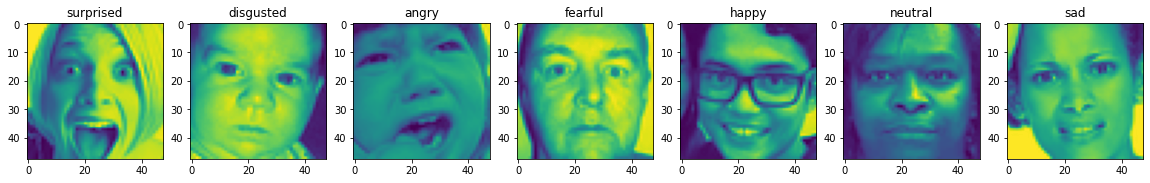

time: 1.26 s (started: 2022-11-27 17:32:29 +00:00)


In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 7, figsize=(20,8))
for i in range(len(target_var)):
    d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

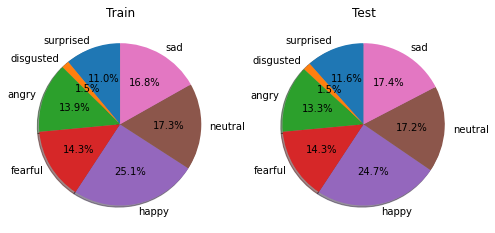

Emotion : surprised
	Training : 3171
	 Testing : 831
Emotion : disgusted
	Training : 436
	 Testing : 111
Emotion : angry
	Training : 3995
	 Testing : 958
Emotion : fearful
	Training : 4097
	 Testing : 1024
Emotion : happy
	Training : 7215
	 Testing : 1774
Emotion : neutral
	Training : 4965
	 Testing : 1233
Emotion : sad
	Training : 4830
	 Testing : 1247
time: 1.24 s (started: 2022-11-27 17:32:31 +00:00)


In [7]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in target_var ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in target_var ])
label = target_var
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in target_var:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining 
test_idg = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size = (48, 48)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=train_dir, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
time: 4.41 s (started: 2022-11-27 17:32:32 +00:00)


In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

time: 2.07 ms (started: 2022-11-27 17:32:36 +00:00)


In [10]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                        

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.5),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    train ,
    validation_data=valid,
    epochs=50)

Epoch 1/50
309/315 [============================>.] - ETA: 1:41 - loss: 6.8828 - accuracy: 0.1774

KeyboardInterrupt: ignored

time: 1h 27min 57s (started: 2022-11-27 17:32:38 +00:00)


In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_pred = model.predict(test)

In [ ]:
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

In [ ]:
y_actual = test.classes[test.index_array]

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred_labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred_labels, digits=4))